In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/Fall/Datasets/diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


- https://ggplot2.tidyverse.org/reference/diamonds.html

## Narrative:

I am data analyst for an up and coming jewelry start up. We recently recieved our new product list for the quarter and need to answer a few key analytics questions in order to properly understand the data.

1. What proportion of diamonds are between .30 and 1.08 carats?
2. How many of the diamonds have equal x and y dimensions?
3. How many of the diamonds have a carat less than the mean carat value?
4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal
5. Which diamond has the highest price per carat? What is its value?
6. Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?
7. Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots.
8. Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.
9. Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?


***

### 1. What proportion of diamonds are between .30 and 1.08 carats?

- Select diamonds between 0.3 and 1.08 carats
- Count number of entries selected
- Divided number of selected entries by total number of entries

In [4]:
# selects all rows with carat measurements between 0.3 and 1.08 and counts the number of rows
range_count = len(df[(df['carat'] > 0.3) & (df['carat'] < 1.08)])
# counts total number of rows in dataframe
total_count = len(df)

In [5]:
# Finds proportion of diamonds in range by dividing total count by range count
proportion_btw = round(range_count/total_count,2)

In [6]:
print(int(proportion_btw * 100), '% of diamonds lie between 0.3 and 1.08 carats')

69 % of diamonds lie between 0.3 and 1.08 carats


***

### 2. How many of the diamonds have equal x and y dimensions?

- Select rows with equal x and y column values
- Count number of entries selected

In [7]:
# Select all rows where x and y column are equal
equal_xy = df[df['x'] == df['y']]

In [8]:
# count number of rows where x and y column are equal
count_equals = len(equal_xy)

In [9]:
print(count_equals, 'diamonds have the same x and y dimensions')

17 diamonds have the same x and y dimensions


***

### 3. How many of the diamonds have a carat less than the mean carat value?

- Take mean of carat column
- select all rows whose carat value is less then calculated mean value

In [10]:
# Take the mean of the carat column
mean_carat = df['carat'].mean()

In [11]:
# Select all rows where carat value is less then mean carat value
less_mean = df[df['carat'] < mean_carat]

In [12]:
# count number of rows less then mean carat value
count_less_mean =len(less_mean)

In [13]:
print(count_less_mean, 'diamonds fall below the mean carat value')

31127 diamonds fall below the mean carat value


- http://www.datasciencemadesimple.com/mean-function-python-pandas-dataframe-row-column-wise-mean/

***

### 4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal 

- Select all rows where cut is either premium or ideal
- count number of entries selected

In [14]:
premium_up = df[(df['cut'] == 'Premium') | (df['cut'] == 'Ideal')]

In [15]:
count_premium_up = len(premium_up)

In [16]:
print(count_premium_up, 'diamonds have a premium cut or better')

35342 diamonds have a premium cut or better


***

### 5. Which diamond has the highest price per carat? What is its value? 

- Divide price column by carat column to get price per carat value and save in new price per carat column
- Order dataframe by price per carat column in descending order
- Select first row from ordered dataframe

In [17]:
# divide price column by carat column and store values in price per carat column
df['$/carat'] = round(df['price']/df['carat'],3)

In [18]:
# order dataframe columns by new price per carat column in descending order and show only first row
order_dol_carat = df.sort_values(by = '$/carat', ascending = False).head(1)

In [19]:
# show only value column of highest diamond
value = order_dol_carat['$/carat']

In [20]:
print(value)

27635    17828.846
Name: $/carat, dtype: float64


- https://stackoverflow.com/questions/35439613/python-pandas-dividing-column-by-another-column
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

***

In [33]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

***

### 6. Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?

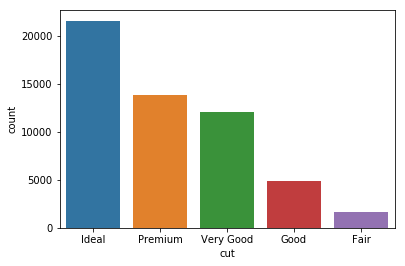

In [34]:
# use seaborn library to construct a countplot showing each type of cut with value count as bar height
sns.countplot(x = 'cut',
              data = df,
              order = df['cut'].value_counts().index)
plt.show()

The bar plot shows that majority of diamonds recorded are of ideal cut. The reason for this is most likely a result of supply and demand and price. Most people are buying diamonds that are ideal cut because of their lower price. Therefore the supply of the ideal cut diamonds is very high and their appearence within the data is highest. 

- https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count

***

7. Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots.

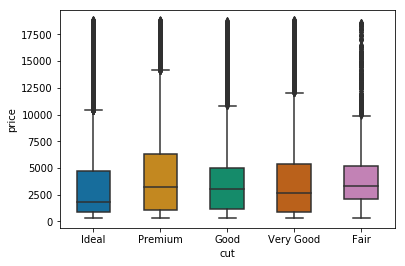

In [39]:
bplot = sns.boxplot(y='price', x='cut', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

The boxplots show:
- for each cut 25% of diamonds are below \\$3000
- the max price for each cut of diamond is between \\$10000 and \\$15000
- There are many outliers in the higher end of the price range
- The median price for each cut are very close to each other

- https://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/

***

8. Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.

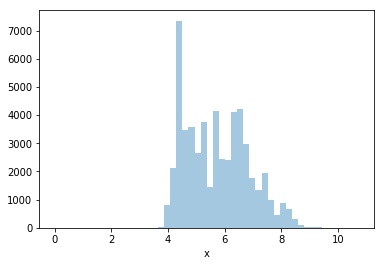

In [51]:
sns.distplot(df['x'],kde = False)
plt.show()

The distribution for the length of diamonds appears to be skewed left, indicating that majoirty of diamonds are below 7 mm.

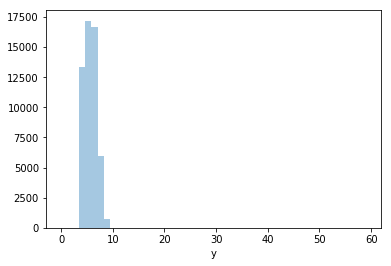

In [49]:
sns.distplot(df['y'],kde = False)
plt.show()

The distribution for the width of the diamonds shows that the width of all diamonds are between approximately 5mm and 10 mm, a very small spread.

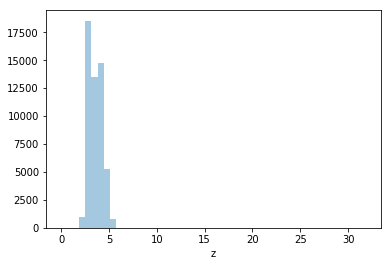

In [54]:
sns.distplot(df['z'],kde = False)
plt.show()

The distribution for depth of the diamonds shows a normal distribution with majoirty of diamond widths falling between 3mm and 5mm

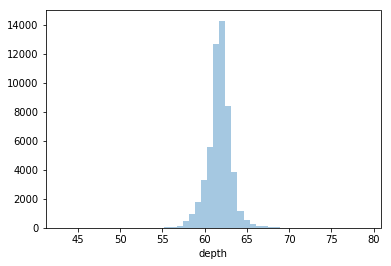

In [53]:
sns.distplot(df['depth'],kde = False)
plt.show()

The distribution for total depth of the diamonds shows a normal distribution with majoirty of diamond widths falling between 57mm and 63mm

- https://www.tutorialspoint.com/seaborn/seaborn_histogram.htm

***

### 9. Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

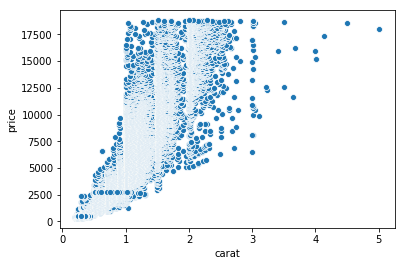

In [57]:
sns.scatterplot(x = 'carat', y = 'price', data = df)

There appears to be a strong positive relationship between carat and price. As carat increases price rises as well.

- https://www.absentdata.com/python-graphs/create-a-seaborn-scatterplot/